# Homework #3

**See Canvas for HW #3 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

## A.1 Fraud detection

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is some (perhaps limited!) empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 


**A.1(a) [6 points] Show that $f(x) = P(X = x)$ is, in fact, a probability distribution function.**

Note that $f(x)$ is positive for all values of $x$ (see below for a verification). Also,

\begin{align*}
\sum^9_{x = 1} \log_{10}\left(\frac{x+1}{x}\right) &= \sum^9_{x = 1} \log_{10}\left(x\right) - \sum^9_{x = 1} \log_{10}\left(x\right) \\
 &= \sum^{10}_{x = 2} \log_{10}\left(x\right) - \sum^9_{x = 1} \log_{10}\left(x\right) \\
 &= \log_{10}(2) + \log_{10}(3) + ... + \log_{10}(10) - \log_{10}(1) - \log_{10}(2) - ... - \log_{10}(9) \\
 &= \log_{10}(10) - \log_{10}(1) = 1 - 0 = 1
\end{align*}

In [19]:
log((2:10)/(1:9),10)

[1] 0.30103000 0.17609126 0.12493874 0.09691001 0.07918125 0.06694679 0.05799195
[8] 0.05115252 0.04575749

**A.1(b) [5 points] Compute the individual probabilities for $x \in \{1,...,9\}$, and compare them to the corresponding discrete uniform distribution (i.e., $P(X = x) = 1/9$). What do you notice?**


See the computations below. The probability for the given distribution starts out higher and then decays faster. For example, $f(1) \approx 0.301 > 1/9$ and $f(9) \approx 0.046 < 1/9$.

In [23]:
x = 1:9; px = log((x+1)/x, 10); py = 1/9
cbind(px,py)

px,py
0.30103000,0.1111111
0.17609126,0.1111111
0.12493874,0.1111111
0.09691001,0.1111111
0.07918125,0.1111111
0.06694679,0.1111111
0.05799195,0.1111111
0.05115252,0.1111111
0.04575749,0.1111111


**A.1(c) [5 points] Obtain the cdf of $X$.**

\begin{align*}
F(x) = \sum^x_{i = 1} \log_{10}\left(\frac{i+1}{i}\right) &= \sum^x_{i = 1} \log_{10}\left(i+1\right) - \sum^x_{i = 1} \log_{10}\left(i\right) \\
 &= \sum^{x+1}_{i = 2} \log_{10}\left(i\right) - \sum^x_{i = 1} \log_{10}\left(i\right) \\
 &= \log_{10}(2) + \log_{10}(3) + ... + \log_{10}(x+1) - \log_{10}(1) - \log_{10}(2) - ... - \log_{10}(x) \\
 &= \log_{10}(x+1) 
\end{align*}

The code below shows that the definition of the CDF and $\log_{10}(x+1)$ yield the same results.

In [30]:
F = function(x){
    F = sum(log(((1:x)+1)/(1:x), 10))
    return(F)
    }
F(3) - log(4,10)

[1] 0

**A.1(d) [4 points] Using the cdf, what is the probability that the leading digit is at most 4? At least 5?**

- $F(4) = \log_{10}(5) \approx 0.70$ 
- $F(5) = \log_{10}(6) \approx 0.78$

In [33]:
log(5,10); log(6,10)

[1] 0.69897

[1] 0.7781513

## A.2

An aircraft seam requires 20 rivets. The seam will have to be reworked if any
of these rivets is defective. Suppose rivets are defective independently of one
another, each with the same probability.

**A.2(a) [5 points] If 18% of all seams need reworking, what is the probability that a rivet is
defective?**



If 18% of all seams need reworking, that means that there is a probability of 0.18 that one or more of twenty rivets will be defective; let's denote this event as A and B as the event tht all rivets are functioning properly. Let p be the probability the rivet is defective.

$$ P(A)=1-P(A^C)=1-P(B)$$

This also means that there is a probability of 0.82 that all 20 rivets are functioning properly.

$$ P(B) = (1-p)^{20} = 0.82 $$
$$ p = 1-0.82^{0.05} $$
$$ p = 0.00987 $$

Therefore, there is a probability of about 0.01 that a rivet is defective. 

**A.2(b)[4 points]  How small should the probability of a defective rivet be to ensure that only
10% of all seams need reworking?**


#### Solution:

Following the same process as part a, we can use $ P(A) = 0.1 = 1-P(B) $ and get the equation:

$$ P(B) = (1-p)^{20} = 0.9 $$
$$ p = 1-0.9^{0.05} $$
$$ p = 0.00525 $$

Therefore, the probability of a defective rivet should be less than 0.5% to ensure that only 10% of all seams need reworking. 

## A.3 Vaccination probabilities?

Please read the blog post [Israeli data: How can efficacy vs. severe disease be strong when 60% of hospitalized are vaccinated?](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated) by Jeffery Morris and answer the following questions.

**A.3(a) [4 points] According to Morris, does the statistic that  "nearly 60% of all patients currently hospitalized for COVID-19 (as of August 15, 2021) are vaccinated" suggest that there is evidence for low vaccine effectiveness? Why or why not?**

No. Morris argues that this statistic is misleading, and does not provide evidence that vaccine are ineffective. Morris writes that 

"When vaccination rates are low, use of raw counts can exaggerate the vaccine effectiveness, and when vaccination rates are high, use of raw counts like this can attenuate the vaccine effectiveness, making it seem lower than it in fact is."

In Israel, nearly $80\%$ of residents 12 years or older have been vaccinated. So, Morris claims, Israel is in the second category, i.e., the category where vaccination rates are high, making effectiveness seem lower.

**A.3(b) [4 points] What is Simpson's paradox? How did Simpson's paradox arise in the Israel vaccine data discussed by Morris?**

Simpson's paradox is the reversal of a trend between two variables when conditioning on a third variable. In the case of the Israeli data, vaccine effectiveness appeared to decrease as a function of severe disease when the data were observed in aggregate. However, if we stratify by (or condition on, in probability language!) age, we see that vaccine effectiveness is higher for both $>50$ and $<50$ groups.


## A.4 How long with this series take?!

Individuals $A$ and $B$ play a sequence of chess games until one player wins $9$ games. $A$ wins an individual game with probability $p$, and $B$ wins a game with probability $1 − p$ (i.e., there are no draws). Let $X$ denote the number of games played.

**A.4(a) [3 points] What are the possible values of X?**

#### Solution:

The minimum number of games is when either player A or B wins all of the first 9 games, so 9 games.  The maximum number of games is if one player wins 9 games and the other wins 8 games, so 17 games.

$$ X = \{ x \in \mathbb{Z} \mid 9 \leq x \leq 17\} = \{9,10,11,12,13,14,15,16,17\}$$

**A.4(b) [8 points] Write out a mathematical expression for $P(X = x)$.**

#### Solution:

Note that trials/games are independent and the probability of each trial/game is the same throughout.

$P(X=x) = P('A \text{ Wins in x games}')+ P('B\text{ Wins in x games}')$

$ = P\left('A \text{ wins 8 of first } (x-1) \text{ games}' \cap  \ 'A \text{ wins game } x')+P('B \text{ wins 8 of first } (x-1) \text{ games}' \cap  \ 'B \text{ wins game } x'\right)$

$ = Binom(x-1,p)*p + Binom(x-1,1-p)*(1-p) $

$ = \binom{x-1}{8}p^{8}(1-p)^{(x-1)-8}*p+\binom{x-1}{1-p}(1-p)^{8}p^{(x-1)-8}*(1-p)$


$ = \binom{x-1}{8}p^{9}(1-p)^{x-9} + \binom{x-1}{8}(1-p)^{9}p^{x-9}$



**A.4(c) [4 points] Let p = 0.5. Find P(X = 12).**



#### Solution:

$ P(X=12) = \binom{(12)-1}{8}(0.5)^{9}(1-(0.5))^{12-9} + \binom{(12)-1}{8}(1-(0.5))^{9}(0.5)^{(12)-9}$

$ = 2* \binom{11}{8}(0.5)^{12}$

$ = 0.0806 $


## A.5 And finally, a proof!

**[6 points] Assume that $A$ and $B$ are independent events. Show that $A^c$ and $B$ are also independent. (Hint: First establish a relationship between $P(A^c \cap B)$,$P(B)$, and $P(A\cap B)$.)**

Let $A$ and $B$ be independent.

Then, $P(A \cap B)=P(A)P(B)$


Consider $P(A^{C} \cap B)$:

$P(A^{C} \cap B) = P(B)P(A^{C} \mid B) = P(B)(1-P(A \mid B))$

$ = P(B)(1-P(A)) = P(B)P(A^{C}) $

Thus, $A^{C}$ and $B$ are independent.

# B Computational problems

## B.1 Conditional probability simulations 

Consider the scenario from Unit #2 in-class code:

Imagine two unmarked bags filled with poker chips. Each bag contains both red poker chips and white poker chips. In bag one, there are 75% red and 25% white; in bag two, there are 75% white and 25% red. Imagine that you pick one bag at random, and, without looking inside, begin to draw chips out, one at a time, replacing and mixing after each draw, so that each draw is independent.


**B.1(a) [5 points] Write a function called `draws`, with one argument `n`, that randomly selects one of the two bags, and then generates a sample of size $n = 20$ from it (i.e., draws $n = 20$ chips, with replacement). Let `0` = "White" and `1` = "Red". Then, execute the line `e = draws(n)`. The variable `e` will consist of a string of `1`s and `0`s, representing what happened as you drew chips. (HINT: The functions `rbinom()` and [`switch()`](https://www.datamentor.io/r-programming/switch-function) might be useful in randomly choosing the bag.)**

In [59]:
mydraws = function(n) {
  bagprob = runif(1,0,1)
  draw = NULL
  if (bagprob > 0.5) {
    bag = 'bag1'
    chip = sample(x=c(0,1),size=n,prob=c(0.75,0.25), replace = TRUE)
    draw = c(draw,chip)
  } else {
    bag = 'bag2'
    chip = sample(c(0,1),size=n,prob=c(0.25,0.75), replace = TRUE)
    draw = c(draw,chip)
    }
    print(bag)
    return(draw)
}
mydraws(10)

[1] "bag2"


[1] 1 1 0 0 1 1 1 1 1 0

In [17]:
set.seed(111)
n = 25
draws = function(n){
    #zero is white, one is red
    draws = switch(rbinom(1,1,0.5)+1, sample(c(1,0), n,prob = c(0.75, 0.25), replace = TRUE),sample(c(1, 0), n, prob = c(0.25, 0.75), replace = TRUE))
    return(draws)
    }

e = draws(n); print(e)

 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0


Our goal for the rest of the question is to use Bayes' theorem to calculuate our degree of belief in the hypothesis $H$~=~"We've selected bag one" given the evidence $e_i$ = "we've drawn $x$ red chips in $i$ draws", $i = 1,...,n$. Remember, Bayes' theorem is

$$P(H \, | \, e_i) = \frac{P(e_i \, | \, H)P_i(H)}{P(e_i \, | \, H)P_i(H) + P(e_i \, | \, H^c)P_i(H^c)}.$$

Achieving our goal will involve setting $P_i(H)$ - the prior probability for $H$ at step $i$ - equal to $P(H \, | \, e_{i-1})$, the posterior probability for $H$ from step $i-1$.

**B1.(b) [4 points] Constuct an $n \times 2$ matrix $p$ where the $i^{th}$ entry of the first column contains $P(e_i \, | \, H)$ and the $i^{th}$ entry of the second column contains $P(e_i \, | \, H^c)$.  Note: These are binomial probabilities, and can be calculated - without a loop! - using `dbinom()` and  `cumsum()`.  `cbind()` can help form that matrix.**

In [63]:
p = cbind(dbinom(cumsum(e), 1:n, 0.75), dbinom(cumsum(e), 1:n, 0.25))
p

2.500000e-01,0.75000000
6.250000e-02,0.56250000
1.562500e-02,0.42187500
3.906250e-03,0.31640625
9.765625e-04,0.23730469
2.441406e-04,0.17797852
6.103516e-05,0.13348389
1.525879e-05,0.10011292
3.814697e-06,0.07508469
9.536743e-07,0.05631351
2.384186e-07,0.04223514


**B.1(c) [3 points] Create an $n \times 2$ matrix `prior` that has $0.5$ in the (1,1) and (1,2) entry, and `NA` everywhere else (for now). This is where we'll store $P_i(H) = P(H \, | \, e_{i-1})$ and $P_i(H^c) = 1-P(H \, | \, e_{i-1})$ for every step.**

In [ ]:
prior = matrix(NA, ncol = 2, nrow = n)
prior[1,] = c(0.5, 0.5)

**B.1(d) [2 points] Create an $n \times 1$ vector `post`  with NAs everywhere. This is where we'll store $P(H \, | \, e_i)$, the posterior probability for $H$ at every step.**

In [ ]:
post = matrix(NA, ncol = 1, nrow = n)

**B.1(e) [5 points] Use the function below to calculate the posterior probability for the first step, i.e., after pulling one chip. Store this in `post[1]`.**

In [ ]:
posterior = function(p, prior){
    #p is a vector of size 2, with likelihoods for each bag
    #prior is a vector of size 2, with priors for each bag
    post = p[1]*prior[1]/(p[1]*prior[1] + p[2]*prior[2])
    return(post)
}

post[1] = posterior(p[1,], prior[1,])

**B.1(f) [5 points] In the loop below, add two lines of code. The first line should use the posterior probability from the $(i-1)$ step to store $P_i(H)$ and $P_i(H^c)$ in `prior` for the $i^{th}$ step. The second line should calculate the posterior probability for the $i^{th}$ step (using the `posterior` function above).**

In [ ]:
for (i in 2:n){
    ### BEGIN ANSWER HERE
    prior[i,] = c(post[i-1], 1 - post[i-1])
    post[i] = posterior(p[i,], prior[i,])
    ### END ANSWER HERE
}

**B.1(g) [4 points] Use `data.frame()` to construct a table containing, at each step $i = 1,...,n$,  the posterior distribution, $P(H \, | \, e_i)$, the likelihood $P(e_i \, | \, H)$, and the prior $P_i(H)$. Then, construct a plot of the posterior probability against $i$, for $i = 1,...,n$.**

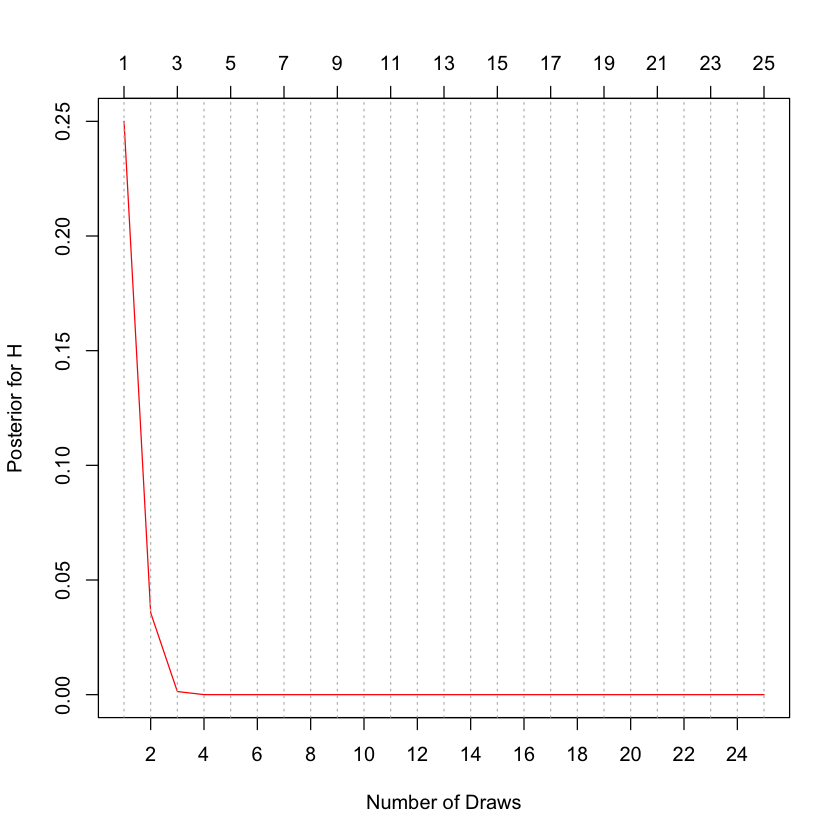

In [ ]:
# data.frame(Posterior = post, Likelihood = p[,1],Prior = prior[,1])
plot(1:n, post, type = "l", xaxt = 'n', col = 2, xlab = "Number of Draws", ylab = "Posterior for H")
axis(3,at=seq(1,25,2))
axis(1,at=seq(2,25,2))
## add gridlines and suppress output
invisible(sapply(1:25, function(x) abline(v=x, col='grey', lty = 3, cex=.3)))


**B.1(h) [4 points] After $n = 20$ draws, what do you believe about $H$? Based on your table and plot, how many chips did you need to draw before you became basically certain about the truth or falsity of $H$?**

This particular example is quite "unlucky" in that we appear to be "basically certain" about the result after 3 draws but are in fact wrong. In general, this is not the case:

[1] "In general, it takes 4.665 draws."

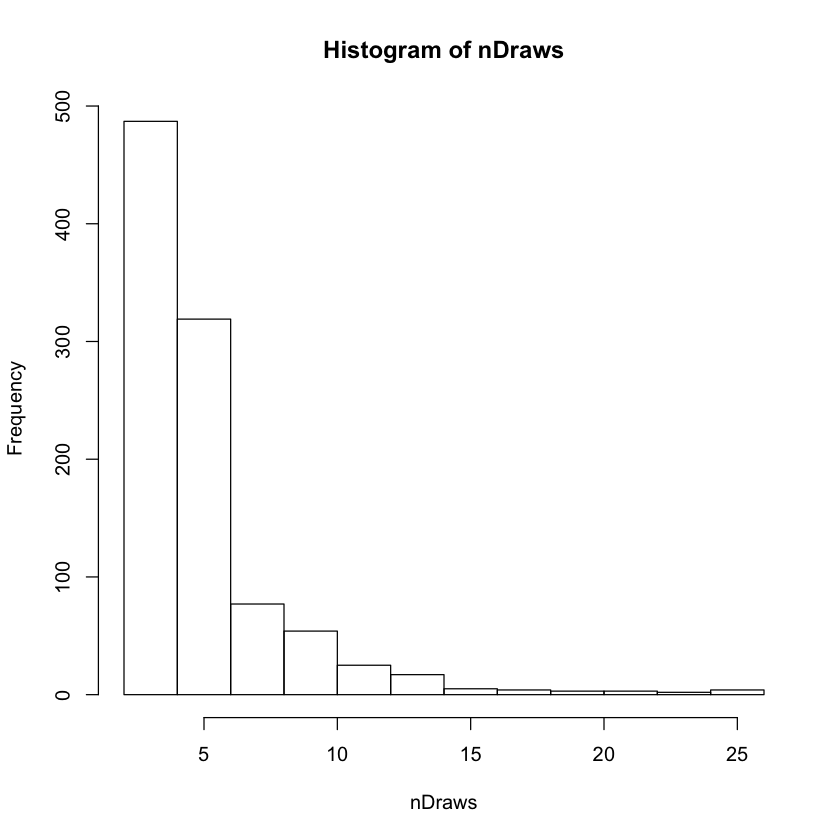

In [ ]:
### just for your information, you weren't expected to do this:
### we do perform the above simulation 1000 times and see how long 
### it usually takes to correctly determine the bag if we stop drawing 
### after the posterior probability is within 1e-3 of the posterior probability 
### after all 25 draws


nDraws <- replicate(1e3, {
    e = draws(n)
    p = cbind(dbinom(cumsum(e), 1:n, 0.75), dbinom(cumsum(e), 1:n, 0.25))
    prior = matrix(NA, ncol = 2, nrow = n)
    prior[1,] = c(0.5, 0.5)
    post = matrix(NA, ncol = 1, nrow = n)
    post[1] = posterior(p[1,], prior[1,])
    for (i in 2:n){
        prior[i,] <- c(post[i-1], 1 - post[i-1])
        post[i] <- posterior(p[i,], prior[i,])
    }
    which(cumsum(c(0,abs(post-post[25]<1e-3)))==1)
})

paste("In general, it takes", mean(nDraws), "draws.")
hist(nDraws)

## B.2 Fraud detection again!

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, some suggest that there is empirical evidence that ``naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

**B.2(a) [6 points] Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, decide whether this dataset is fraudulent.**

In [18]:
tax = read.csv(url("https://raw.githubusercontent.com/bzaharatos/STAT-5000/main/data/tax.txt"), sep="\t")[[1]]
head(tax)
summary(tax)

[1] 5601 4977 5959 6267 5221 3094

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0    13376    27359    90914    74589 21541002 

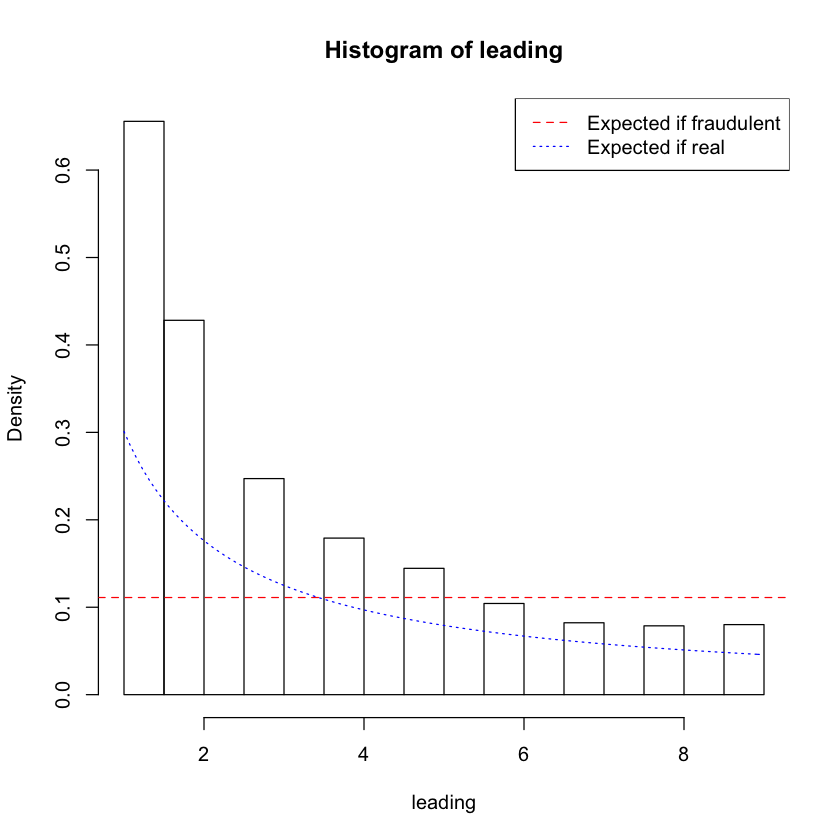

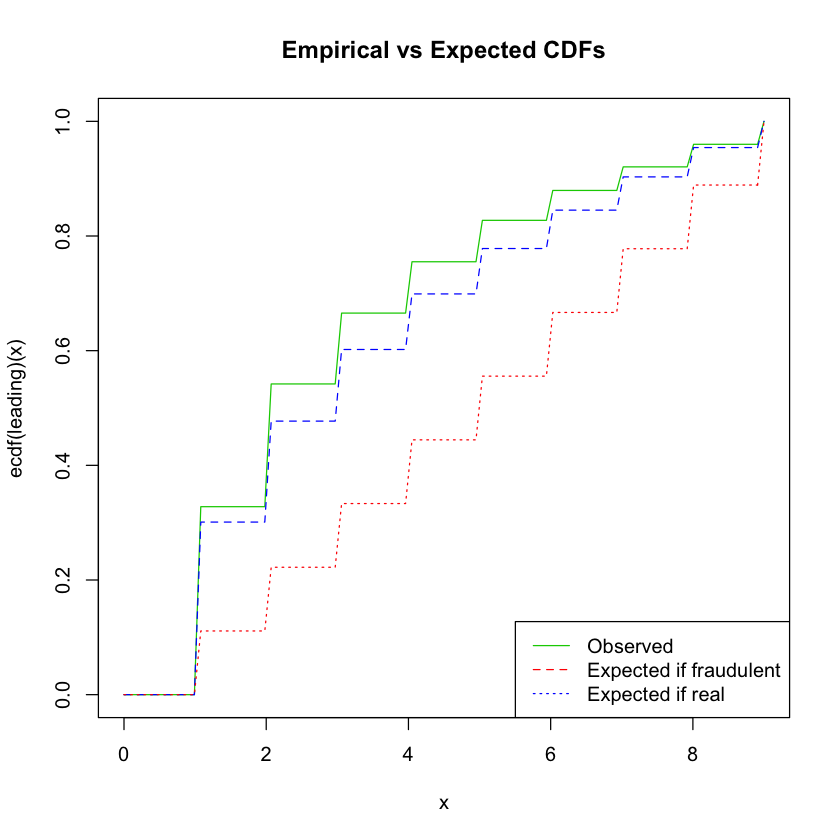

In [ ]:
## extract leading digits
leading0 <- as.numeric(substr(tax,1,1))
## remove zeros
leading <- leading0[leading0!=0]

## plot histogram and overlay curves for fradulent and true cases
hist(leading, probability = T)

abline(h=1/9, col = 2, lty = 2)
curve(log((x+1)/x,10), add = T, col = 4, lty = 3) 
## we can ignore warning due to division by zero in graphing curve

## add legend
legend("topright", col=c(2,4), lty = 2:3, 
       legend = c("Expected if fraudulent",
                  "Expected if real"))


## we could also compare the empirical and expected CDFs 
## (you weren't expected to do this)

curve(ecdf(leading)(x),0,9, col =3, main = "Empirical vs Expected CDFs")
curve(stepfun(1:9,c(0,cumsum(log((2:10)/(1:9),10))))(x),0,9,
      add = T, col = 4, lty = 2)
curve(stepfun(1:9,(0:9)/9)(x),0,9,
      add = T, col = 2, lty = 3)

## add legend
legend("bottomright", col=c(3,2,4), lty = 1:3, 
       legend = c("Observed",
                  "Expected if fraudulent",
                  "Expected if real"))

**B.2(b) [4 points] After the 2020 US presidential election, some individuals tried to support claims of election fraud using the distribution described above (known as "Benford's Law"). They claimed that the leading digit of local vote tallies did not match the distribution, which provides evidence of fraud. Many academics pushed back against this. Please read this [fact check article](https://www.reuters.com/article/uk-factcheck-benford/fact-check-deviation-from-benfords-law-does-not-prove-election-fraud-idUSKBN27Q3AI) and briefly summarize whether you think Benford' Law provides evidence of election fraud.**



"The degree to which Benford’s Law can be used as an indicator of electoral fraud has been debated by academics, but the application of the rule to the leading digit of local vote tallies is problematic and apparent deviation from the law cannot be used alone to prove electoral fraud, experts say."